### Module Imports

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Data

In [2]:
#import combined data
df = pd.read_csv('./data/combined_data.csv', low_memory=False)
print(df.shape)
df.head()

(31486, 108)


,property_name,parent_property_id,parent_property_name,year_ending,"nyc_borough,_block_and_lot_(bbl)",nyc_building_identification_number_(bin),address_1,city,postal_code,primary_property_type_-_self_selected,...,number_of_active_it_meters,generation_date,submission_date,latitude,longitude,community_board,council_district,census_tract,nta,borough
0,Astoria Blvd Property,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,4006520042,4538607,36-16 Astoria Blvd.,Long Island City,11103,Multifamily Housing,...,0.0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.769272,-73.913633,401.0,22.0,6502.0,Astoria,QUEENS
1,Stellar - 70 West 93rd Street,20599688,Stellar - Campus West 93rd Street,12/31/2021,1-01206-0001,1031627,70 West 93rd Street,New York,10025,Multifamily Housing,...,0.0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.790503,-73.967920,107.0,6.0,177.0,Upper West Side,MANHATTAN
2,Stellar - 28-50 West 97th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-01832-0043,1055265,28-50 West 97th Street,New York,10025,Multifamily Housing,...,0.0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.792758,-73.965171,107.0,7.0,181.0,Upper West Side,MANHATTAN
3,Stellar - 310 Greenwich St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-00142-0025,1083157;1083235;1083237;1083240;1083241;108324...,310 Greenwich Street / 40 Harrison Street,New York,10013,Multifamily Housing,...,0.0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Stellar - 87 Hamilton Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2021,1-02072-0039,1061772,87 Hamilton Place,New York,10031,Multifamily Housing,...,0.0,09/26/2022 12:00:00 AM,09/26/2022 12:00:00 AM,40.823008,-73.950670,109.0,7.0,225.0,Hamilton Heights,MANHATTAN


### Graphing Functions

In [3]:
#these functions were adapted from another one of my projects
def eda_histograms(df, columns, title):
    '''fn generates matrix of histograms'''
    nrows = int(np.ceil(len(columns)/4)) 
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=(12, nrows*3)) 
    ax = ax.ravel() 
    for i, column in enumerate(columns): 
        a = sns.histplot(data=df, x=df[column], bins=25, ax=ax[i], color='teal')
        a.set(xlabel='_'.join(column.split('_')[:2]), ylabel='Count')
        a.tick_params(labelsize=8)
    plt.tight_layout(pad=1.2)

    #Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1

    plt.suptitle(title, fontsize=20, y=1.075);

In [4]:
def eda_scatterplot(df, columns, title):  
    '''fn generates matrix of scatterplots'''
    nrows = int(np.ceil(len(columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows*3), sharey=True)
    ax = ax.ravel()
    for i, column in enumerate(columns):
        a = sns.scatterplot(data=df, x=column, y='energy_star_score', ax=ax[i], color='mediumseagreen')
        a.set(xlabel='_'.join(column.split('_')[:2]), ylabel='Score')
    plt.tight_layout(pad=1.2)
    
    # Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle(title, fontsize=20, y=1.075);

In [5]:
def eda_barplot(df, columns):   
    '''fn generates matrix of barplots'''
    nrows = int(np.ceil(len(columns)/2))
    ncols = 2
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, nrows*4))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(columns):
        a = sns.barplot(data=df, y=column, x='energy_star_score', ax=ax[i], orient='h', palette='rocket')
        a.set_title('_'.join(column.split('_')[:2]), fontsize=12)
        a.set(xlabel='Energy Score', ylabel=None,
              xticks=[0, 20, 40, 60, 80, 100])
    plt.tight_layout(pad=1.2)

    # Hide unused plots
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1

    plt.suptitle('Nominal Features vs Energy Score', fontsize=20, y=1.075);

### Target EDA

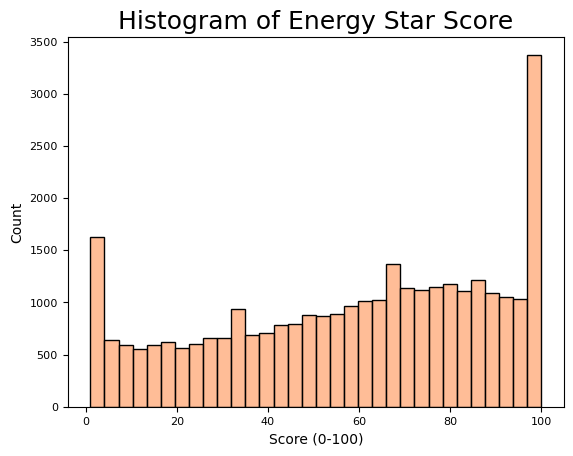

In [6]:
# target variable is energy_star_score
# let's look at a histogram of it
# I've already dropped the null values at this point
ess = sns.histplot(data=df, x='energy_star_score', color='#ffa774ff')
ess.set_title('Histogram of Energy Star Score',fontsize=18)
ess.set(xlabel='Score (0-100)')
ess.tick_params(labelsize=8)

The main thing I noticed about the target data is that it does not follow a normal distribution.  If `0` and `100` were excluded, there might be a slightly more normal distribution, but still skewed.  
This could be because:
1) The score falls within 0 and 100, which means that any outliers at either end (very efficient buildings and very inefficient buildings) are 'erased' and scored the same as the buildings that are just a bit above/below average
2) One of the categories in the original data is 'eligibility to received an energy score', which determines if a building meets the necessary prerequisites for an energy star score.  This likely creates some initial bias - buildings without energy or water meters would not be able to get a score, but are also more likely to be less efficient buildings.  

### Feature EDA

In [7]:
# this is mostly the same columns dropped in the Data Cleaning section, 
# but I kept a few additional ones (like city, neighborhood, largest property-type sq_ft) 
# (which means I removed them from this list, since this is the list to drop)
# just to allow for EDA

col_to_drop = ['property_name', 'energy_star_score',      # don't need target in these results
               'parent_property_id', 'parent_property_name',      # unique identifiers, equivalent to index
               'year_ending',       # not relevant since this is not a timeseries project
               'nyc_borough,_block_and_lot_(bbl)', 'nyc_building_identification_number_(bin)',       # unique identifiers, equivalent to index
               'address_1',      # unique identifiers, equivalent to index; also too identifying
               'primary_property_type_-_self_selected',       # only keeping primary_property_type_-_portfolio_manager-calculated
               'national_median_reference_property_type',       # only keeping primary_property_type_-_portfolio_manager-calculated
               'list_of_all_property_use_types_at_property',       # only keeping primary_property_type_-_portfolio_manager-calculated
               'largest_property_use_type',       # only keeping primary_property_type_-_portfolio_manager-calculated
               'construction_status',      # mostly 'existing', not useful
               'metered_areas_(energy)', 'metered_areas_(water)',       # just 'whole building' vs 'whole property'. not informative
               'national_median_energy_star_score',       # 50.0 for all observations. this is a benchmark, not useful as a feature
               'multifamily_housing_-_gross_floor_area_(ft²)',       # removing all property_type sub-features
               'multifamily_housing_-_number_of_bedrooms',       # removing all property_type sub-features
               'multifamily_housing_-_number_of_bedrooms_density_(number_per_1,000_sq_ft)',       # removing all property_type sub-features
               'multifamily_housing_-_total_number_of_residential_living_units',       # removing all property_type sub-features
               'multifamily_housing_-_total_number_of_residential_living_units_density_(number_per_1,000_sq_ft)',       # removing all property_type sub-features
               'multifamily_housing_-_number_of_residential_living_units_in_a_high-rise_building_(10_or_more_stories)',       # removing all property_type sub-features
               'multifamily_housing_-_number_of_residential_living_units_in_a_high-rise_building_density_(number_per_1,000_sq_ft)',       # removing all property_type sub-features
               'multifamily_housing_-_number_of_residential_living_units_in_a_mid-rise_building_(5-9_stories)',       # removing all property_type sub-features
               'multifamily_housing_-_number_of_residential_living_units_in_a_mid-rise_building_density_(number_per_1,000_sq_ft)',       # removing all property_type sub-features
               'multifamily_housing_-_percent_that_can_be_cooled',       # removing all property_type sub-features
               'multifamily_housing_-_percent_that_can_be_heated',       # removing all property_type sub-features
               'estimated_data_flag_-_electricity_(grid_purchase)', 'estimated_data_flag_-_natural_gas',        # too many nulls and '0' values
               'estimated_values_-_energy', 'estimated_values_-_water',       # just 'yes' vs 'no'. not informative
               'alert_-_data_center_issue_(with_estimates,_it_configuration,_or_it_meter)',       # too many nulls and '0' values
               'alert_-_energy_meter_has_less_than_12_full_calendar_months_of_data',       # too many nulls and '0' values
               'alert_-_energy_meter_has_gaps',        # too many nulls and '0' values
               'alert_-_energy_meter_has_overlaps',       # too many nulls and '0' values
               'alert_-_energy_-_no_meters_selected_for_metrics',        # too many nulls and '0' values
               'alert_-_energy_meter_has_single_entry_more_than_65_days',       # too many nulls and '0' values
               'alert_-_water_meter_has_less_than_12_full_calendar_months_of_data',       # too many nulls and '0' values
               'alert_-_property_has_no_uses',        # too many nulls and '0' values
               'default_values', 'temporary_values',       # too many nulls and '0' values
               'property_gfa_-_calculated_(buildings_and_parking)_(ft²)',       # only keeping property_gfa_-_self-reported_(ft²)
               'property_gfa_-_calculated_(buildings)_(ft²)',        # only keeping property_gfa_-_self-reported_(ft²)
               'indoor_water_use_(all_water_sources)_(kgal)',       # too many nulls and '0' values
               'municipally_supplied_potable_water_-_indoor_use_(kgal)',       # too many nulls and '0' values
               'municipally_supplied_potable_water_-_total_use_(all_meter_types)_(kgal)',       # too many nulls and '0' values
               'last_modified_date_-_electric_meters',       # too many nulls and the majority of values appeared to be date of data collection, so not helpful
               'last_modified_date_-_gas_meters',        # too many nulls and the majority of values appeared to be date of data collection, so not helpful
               'last_modified_date_-_water_meters',        # too many nulls and the majority of values appeared to be date of data collection, so not helpful
               'last_modified_date_-_property_use',        # too many nulls and the majority of values appeared to be date of data collection, so not helpful
               'number_of_active_energy_meters_-_used_to_compute_metrics',      # only keeping number_of_active_energy_meters_-_total
               'number_of_active_energy_meters_-_not_used_to_compute_metrics',       # only keeping number_of_active_energy_meters_-_total
               'number_of_active_it_meters',       # only keeping number_of_active_energy_meters_-_total
               'generation_date', 'submission_date',       # unique identifiers, equivalent to index
               'latitude', 'longitude',       # unique identifiers, equivalent to index
               'community_board', 'council_district', 'census_tract']      # too many nulls and 'Not Available' values


In [8]:
features = df.drop(columns=col_to_drop).copy()
features.head()

,city,postal_code,primary_property_type_-_portfolio_manager-calculated,largest_property_use_type_-_gross_floor_area_(ft²),year_built,number_of_buildings,occupancy,energy_star_certification_-_eligibility,site_eui_(kbtu/ft²),weather_normalized_site_eui_(kbtu/ft²),...,egrid_output_emissions_rate_(kgco2e/mbtu),avoided_emissions_-_offsite_green_power_(metric_tons_co2e),avoided_emissions_-_onsite_and_offsite_green_power_(metric_tons_co2e),percent_of_electricity_that_is_green_power,property_gfa_-_self-reported_(ft²),water_use_(all_water_sources)_(kgal),last_modified_date_-_property,number_of_active_energy_meters_-_total,nta,borough
0,Long Island City,11103,Multifamily Housing,25000.0,2010,1,100,No,66.7,70.4,...,84.5,0.0,0.0,0.0,25000.0,910.8,07/11/2022 11:06 AM EDT,8.0,Astoria,QUEENS
1,New York,10025,Multifamily Housing,260780.0,1970,1,100,No,19.2,19.2,...,84.5,0.0,0.0,0.0,261980.0,12826.8,09/12/2022 04:34 PM EDT,6.0,Upper West Side,MANHATTAN
2,New York,10025,Multifamily Housing,324378.0,1943,1,100,No,66.9,72.0,...,84.5,0.0,0.0,0.0,333342.0,16038.0,04/09/2022 06:13 PM EDT,3.0,Upper West Side,MANHATTAN
3,New York,10013,Multifamily Housing,1039841.0,1975,3,100,No,113.8,121.1,...,84.5,0.0,0.0,0.0,1112900.0,68151.7,09/12/2022 04:33 PM EDT,4.0,NaN,NaN
4,New York,10031,Multifamily Housing,72662.0,1941,1,100,No,114.6,NaN,...,84.5,0.0,0.0,0.0,72662.0,7450.3,05/22/2022 10:41 PM EDT,11.0,Hamilton Heights,MANHATTAN


In [9]:
features.dtypes

city                                                                                   object
postal_code                                                                            object
primary_property_type_-_portfolio_manager-calculated                                   object
largest_property_use_type_-_gross_floor_area_(ft²)                                    float64
year_built                                                                              int64
number_of_buildings                                                                     int64
occupancy                                                                               int64
energy_star_certification_-_eligibility                                                object
site_eui_(kbtu/ft²)                                                                   float64
weather_normalized_site_eui_(kbtu/ft²)                                                float64
national_median_site_eui_(kbtu/ft²)                         

In [10]:
df.drop(columns=col_to_drop)._get_numeric_data().columns

Index(['largest_property_use_type_-_gross_floor_area_(ft²)', 'year_built',
       'number_of_buildings', 'occupancy', 'site_eui_(kbtu/ft²)',
       'weather_normalized_site_eui_(kbtu/ft²)',
       'national_median_site_eui_(kbtu/ft²)', 'site_energy_use_(kbtu)',
       'weather_normalized_site_energy_use_(kbtu)',
       'weather_normalized_site_electricity_intensity_(kwh/ft²)',
       'weather_normalized_site_natural_gas_intensity_(therms/ft²)',
       'source_eui_(kbtu/ft²)', 'weather_normalized_source_eui_(kbtu/ft²)',
       'national_median_source_eui_(kbtu/ft²)', 'source_energy_use_(kbtu)',
       'weather_normalized_source_energy_use_(kbtu)', 'natural_gas_use_(kbtu)',
       'natural_gas_use_(therms)',
       'weather_normalized_site_natural_gas_use_(therms)',
       'electricity_use_-_grid_purchase_(kbtu)',
       'electricity_use_-_grid_purchase_(kwh)',
       'weather_normalized_site_electricity_(kwh)',
       'electricity_use_-_grid_purchase_and_generated_from_onsite_renewable_

In [11]:
# let's look at a subsection of these numerical features
# occupancy, size, ghg emissions and site vs source eui are important for sure
# year_built is not included in the portfolio manager calculation but it will be interesting to investigate it
num_cols = ['year_built', 'occupancy', 'property_gfa_-_self-reported_(ft²)', 'direct_ghg_emissions_(metric_tons_co2e)',
            'site_eui_(kbtu/ft²)', 'site_energy_use_(kbtu)', 'source_eui_(kbtu/ft²)', 'source_energy_use_(kbtu)'] 

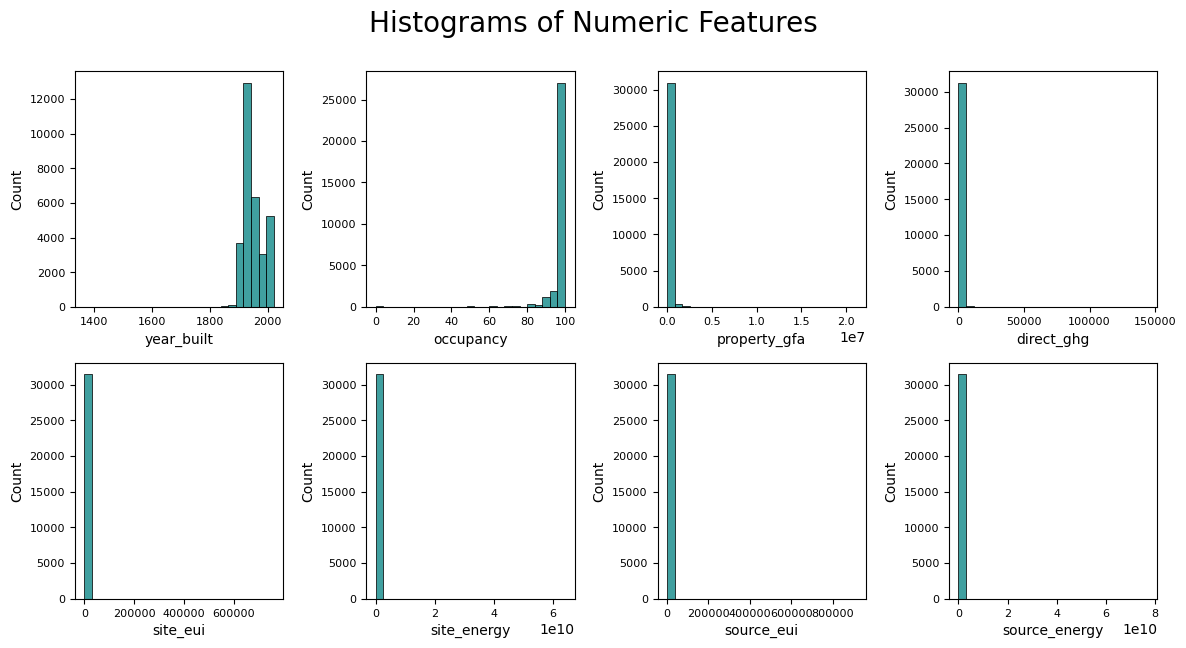

In [12]:
eda_histograms(df, 
               num_cols, 
               'Histograms of Numeric Features')

Most of these distributions are heavily skewed.  It doesn't seem like any of these features will provide much value to predicting the Energy Score. 

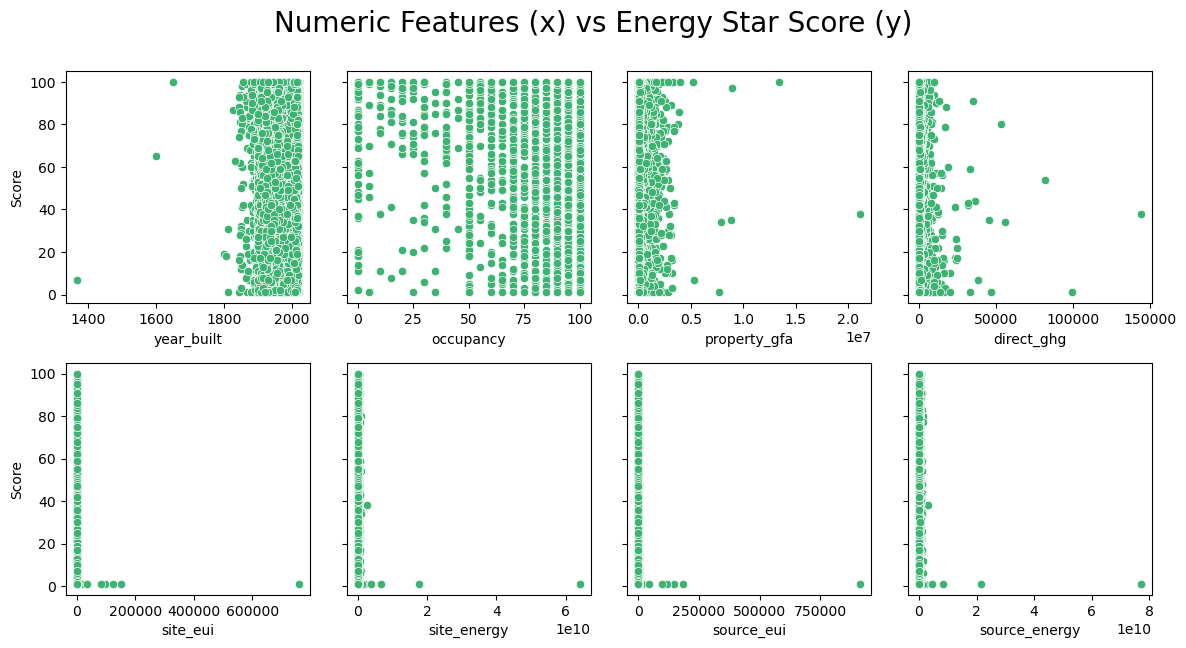

In [13]:
eda_scatterplot(df, 
                num_cols,  
                'Numeric Features (x) vs Energy Star Score (y)')

The scatterplots are showing similar information - the majority of data points are skewed on one side or the other, and none of these indicate any linearity with the Energy Score except for occupancy - it does seem that as occupancy decreases, the score improves.

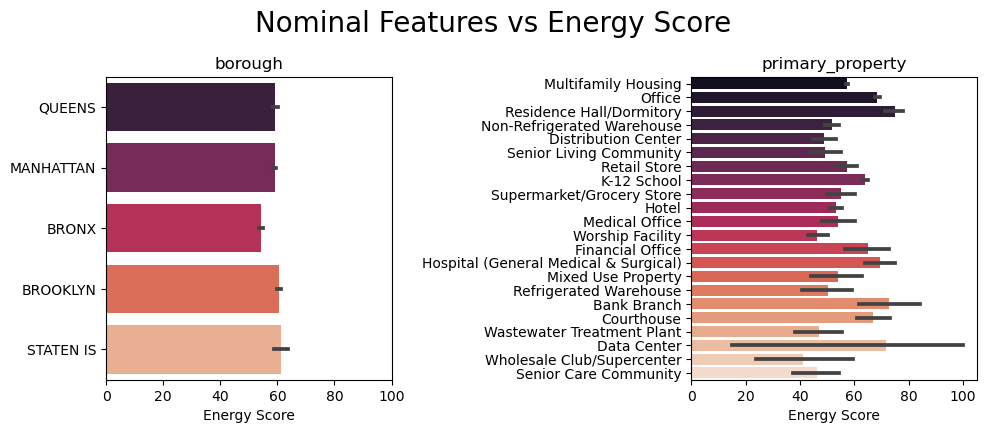

In [14]:
# after quickly looking at city, nta and zip, there are too many values to see anything meaningful in a graph
# I'm focusing here on the two that are relatively normally distributed
nom_cols = ['borough', 'primary_property_type_-_portfolio_manager-calculated']
eda_barplot(df, nom_cols)

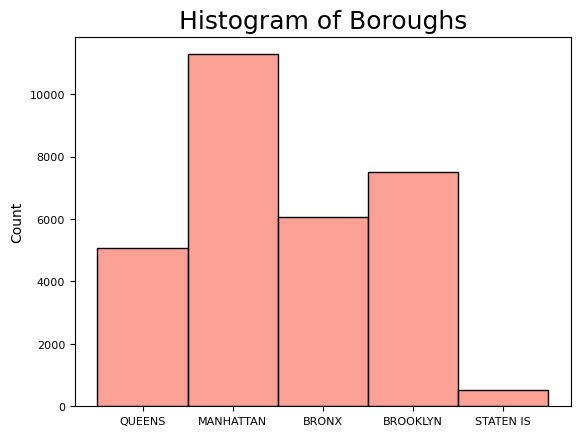

In [15]:
b = sns.histplot(data=df, x='borough', color='salmon')
b.set_title('Histogram of Boroughs',fontsize=18)
b.set(xlabel=None)
b.tick_params(labelsize=8);

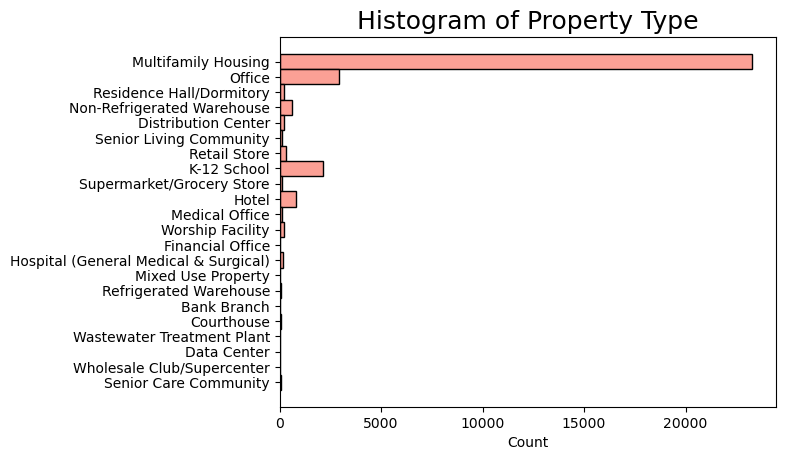

In [16]:
pp = sns.histplot(data=df, y='primary_property_type_-_portfolio_manager-calculated', 
                  color='salmon', orientation='horizontal')
pp.set_title('Histogram of Property Type',fontsize=18)
pp.set(ylabel=None);

The bar chart for boroughs shows that the scores are pretty uniform, but that Staten Island does have a slightly higher average score.  However, from the borough histogram, we can see that Staten Island has very few observations, which suggests the higher score is just due to a smaller sample size.

In the primary_property chart, the residence hall/dormitory has the highest average score, which could be due to the small sample size, or also because AC and heat are usually centrally controlled in residence halls.  